# Import Raw Data

In [2]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as file:
        reader = unicodecsv.DictReader(file)
        return list(reader)

raw_data = read_csv('survey_results_raw_column_updated.csv')

In [3]:
raw_data[0]

{u'Timestamp': u'2017/07/04 4:04:48 AM GMT+1',
 u'age': u'28',
 u'branch_assoc': u'Yes',
 u'campus_job': u'Yes',
 u'cgpa': u'7 to 8',
 u'council_or_fest': u'Yes',
 u'course': u'Electrical and Electronic Engineering',
 u'gender': u'Male',
 u'graduation': u'2013',
 u'job_sat': u'7',
 u'risk_appetite': u'Would have been more than what I had',
 u'second_degree': u'No',
 u'second_degree_field': u'',
 u'student_club': u'Yes',
 u'student_club_post': u'Yes',
 u'time_acad': u'I would have spent more time than I did',
 u'time_eca': u'I would have spent the same amount of time that I did',
 u'time_experiment': u'Would have spent more time applying/experimenting',
 u'time_social': u'I would have spent the same amount of time that I did',
 u'work_field': u'Data analytics',
 u'workex': u'4'}

In [4]:
len(raw_data)

118

# Input value alteration functions

In [5]:
# A function to convert Yes to 1 and No to 2
def convert_yes_no(my_list, value):
    if my_list[value] == "Yes":
        my_list[value] = 1
    elif my_list[value] == "No":
        my_list[value] = 0

# A function to convert text based answer to short forms
def convert_text(my_list, value, short_text):
    my_list[value] = short_text

# Alter input values
Altering some input values for ease of analysis

In [6]:
for entry in raw_data:
    convert_yes_no(entry, "branch_assoc")
    convert_yes_no(entry, "campus_job")
    convert_yes_no(entry, "council_or_fest")
    convert_yes_no(entry, "student_club")
    convert_yes_no(entry, "student_club_post")
    convert_yes_no(entry, "second_degree")
    
    # Changing course to short form
    if entry["course"] == "Mechanical Engineering":
        convert_text(entry, "course", "mech")
    elif entry["course"] == "Chemical Engineering":
        convert_text(entry, "course", "chem")
    elif entry["course"] == "Electrical and Electronic Engineering":
        convert_text(entry, "course", "eee")
    elif entry["course"] == "Metallurgy and Materials Engineering":
        convert_text(entry, "course", "meta")
    elif entry["course"] == "Computer Science and Engineering":
        convert_text(entry, "course", "cse")
    elif entry["course"] == "Civil Engineering":
        convert_text(entry, "course", "civil")
    elif entry["course"] == "Electronics and Communication Engineering":
        convert_text(entry, "course", "ece")
    elif entry["course"] == "Bio Technology":
        convert_text(entry, "course", "biot")
        
    # converting time spent on various activities to numerical values for regression
    # less = 1
    # same = 2
    # more = 3
    
    if entry["time_acad"] == "I would have spent less time than I did":
        convert_text(entry, "time_acad", 1)
    elif entry["time_acad"] == "I would have spent the same amount of time that I did":
        convert_text(entry, "time_acad", 2)
    elif entry["time_acad"] == "I would have spent more time than I did":
        convert_text(entry, "time_acad", 3)
        
    if entry["time_eca"] == "I would have spent less time than I did":
        convert_text(entry, "time_eca", 1)
    elif entry["time_eca"] == "I would have spent the same amount of time that I did":
        convert_text(entry, "time_eca", 2)
    elif entry["time_eca"] == "I would have spent more time than I did":
        convert_text(entry, "time_eca", 3)
    
    if entry["time_social"] == "I would have spent less time than I did":
        convert_text(entry, "time_social", 1)
    elif entry["time_social"] == "I would have spent the same amount of time that I did":
        convert_text(entry, "time_social", 2)
    elif entry["time_social"] == "I would have spent more time than I did":
        convert_text(entry, "time_social", 3)
    
    if entry["risk_appetite"] == "Would have been lesser than what I had":
        convert_text(entry, "risk_appetite", 1)
    elif entry["risk_appetite"] == "Would have been the same that I had":
        convert_text(entry, "risk_appetite", 2)
    elif entry["risk_appetite"] == "Would have been more than what I had":
        convert_text(entry, "risk_appetite", 3)
    
    if entry["time_experiment"] == "Would have spent less time applying/experimenting":
        convert_text(entry, "time_experiment", 1)
    elif entry["time_experiment"] == "Would have spent the same amount of time as academics":
        convert_text(entry, "time_experiment", 2)
    elif entry["time_experiment"] == "Would have spent more time applying/experimenting":
        convert_text(entry, "time_experiment", 3)
    
    # Converting Gender into numeric values
    # Female = 1
    # Male = 2
    if entry["gender"] == "Female":
        convert_text(entry, "gender", 1)
    elif entry["gender"] == "Male":
        convert_text(entry, "gender", 2)
        
    # Converting CGPA into five groups
    # <6
    # 6 to 7
    # 7 to 8
    # 8 to 9
    # >9
    if entry["cgpa"] == "<6":
        convert_text(entry, "cgpa", 1)
    elif entry["cgpa"] == "6 to 7":
        convert_text(entry, "cgpa", 2)
    elif entry["cgpa"] == "7 to 8":
        convert_text(entry, "cgpa", 3)
    elif entry["cgpa"] == "8 to 9":
        convert_text(entry, "cgpa", 4)
    elif entry["cgpa"] == ">9":
        convert_text(entry, "cgpa", 5)
        
    
raw_data[12] #verification

{u'Timestamp': u'2017/07/07 6:44:08 PM GMT+1',
 u'age': u'25',
 u'branch_assoc': 1,
 u'campus_job': 1,
 u'cgpa': 4,
 u'council_or_fest': 0,
 u'course': 'eee',
 u'gender': 2,
 u'graduation': u'2013',
 u'job_sat': u'7',
 u'risk_appetite': 3,
 u'second_degree': 0,
 u'second_degree_field': u'',
 u'student_club': 1,
 u'student_club_post': 1,
 u'time_acad': 3,
 u'time_eca': 2,
 u'time_experiment': 2,
 u'time_social': 2,
 u'work_field': u'Data science',
 u'workex': u'3'}

# Data type conversion functions
Below cell has functions to alter data types

In [7]:
def parse_int(num):
    if num == '':
        return None
    else:
        return int(num)
    
def parse_float(num):
    if num == '':
        return None
    else:
        return float(num)

def parse_empty_string(string):
    if string == '':
        return None
    else:
        return string
    
# More to be added    

# Data type conversions

In [8]:
for entry in raw_data:
    entry["age"] = parse_int(entry["age"])
    #entry["graduation"] = parse_int(entry["graduation"])
    entry["job_sat"] = parse_int(entry["job_sat"])
    entry["workex"] = parse_float(entry["workex"])
    entry["second_degree_field"] = parse_empty_string(entry["second_degree_field"])

raw_data[14] # verification

{u'Timestamp': u'2017/07/08 4:51:37 PM GMT+1',
 u'age': 26,
 u'branch_assoc': 0,
 u'campus_job': 1,
 u'cgpa': 3,
 u'council_or_fest': 0,
 u'course': 'eee',
 u'gender': 2,
 u'graduation': u'2013',
 u'job_sat': 8,
 u'risk_appetite': 2,
 u'second_degree': 0,
 u'second_degree_field': None,
 u'student_club': 0,
 u'student_club_post': 1,
 u'time_acad': 2,
 u'time_eca': 3,
 u'time_experiment': 2,
 u'time_social': 2,
 u'work_field': u'Data Analytics / Software Design',
 u'workex': 4.0}

# Data representation, visualization and analysis

In [9]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

age = []
graduation_year = []

for entry in raw_data:
    age.append(entry["age"])
    graduation_year.append(entry["graduation"])

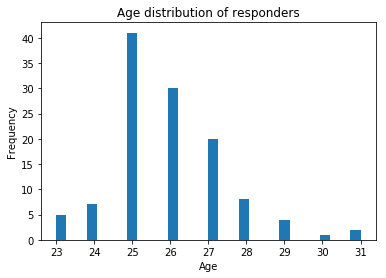

In [10]:
plt.hist(age, bins=30)
plt.title("Age distribution of responders")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [11]:
grad_year_counts = Counter(graduation_year)

grad_year_counts

Counter({u'2009': 4, u'2010': 4, u'2011': 5, u'2012': 39, u'2013': 66})

# Multiple linear regression

In [12]:
import statsmodels.api as sm
import numpy as np


/Users/krishanth/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
df = pd.DataFrame(raw_data, columns=["branch_assoc", "cgpa", "council_or_fest", "gender", "student_club", "student_club_post"])
target = pd.DataFrame(raw_data, columns=["job_sat"])

In [14]:
X = df["cgpa"]
Y = target["job_sat"]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                job_sat   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     732.8
Date:                Sun, 05 Nov 2017   Prob (F-statistic):           3.33e-52
Time:                        22:27:46   Log-Likelihood:                -287.85
No. Observations:                 118   AIC:                             577.7
Df Residuals:                     117   BIC:                             580.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cgpa           2.0856      0.077     27.070      0.000       1.933       2.238
==============================================================================
Omnibus:                        3.158   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                2.839
Skew:                          -0.200   Prob(JB):                        0.242
Kurtosis:                       3.646   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
raw_data[14]

{u'Timestamp': u'2017/07/08 4:51:37 PM GMT+1',
 u'age': 26,
 u'branch_assoc': 0,
 u'campus_job': 1,
 u'cgpa': 3,
 u'council_or_fest': 0,
 u'course': 'eee',
 u'gender': 2,
 u'graduation': u'2013',
 u'job_sat': 8,
 u'risk_appetite': 2,
 u'second_degree': 0,
 u'second_degree_field': None,
 u'student_club': 0,
 u'student_club_post': 1,
 u'time_acad': 2,
 u'time_eca': 3,
 u'time_experiment': 2,
 u'time_social': 2,
 u'work_field': u'Data Analytics / Software Design',
 u'workex': 4.0}

In [17]:
student_club_misrep = []

for entry in raw_data:
    if entry['student_club'] == 0 and entry['student_club_post'] == 1:
        student_club_misrep.append(entry)

print student_club_misrep

for i in raw_data:
    for j in student_club_misrep:
        if i["Timestamp"] == j["Timestamp"]:
            del raw_data[raw_data.index(i)]

len(raw_data)

[{u'time_acad': 2, u'risk_appetite': 2, u'time_experiment': 2, u'campus_job': 1, u'workex': 4.0, u'branch_assoc': 0, u'Timestamp': u'2017/07/08 4:51:37 PM GMT+1', u'age': 26, u'cgpa': 3, u'student_club_post': 1, u'second_degree_field': None, u'graduation': u'2013', u'course': 'eee', u'council_or_fest': 0, u'student_club': 0, u'gender': 2, u'time_social': 2, u'time_eca': 3, u'work_field': u'Data Analytics / Software Design', u'second_degree': 0, u'job_sat': 8}, {u'time_acad': 3, u'risk_appetite': 2, u'time_experiment': 3, u'campus_job': 1, u'workex': 2.0, u'branch_assoc': 1, u'Timestamp': u'2017/07/08 11:47:29 PM GMT+1', u'age': 26, u'cgpa': 3, u'student_club_post': 1, u'second_degree_field': u'Chemical and biological engineering ', u'graduation': u'2012', u'course': 'chem', u'council_or_fest': 0, u'student_club': 0, u'gender': 1, u'time_social': 2, u'time_eca': 3, u'work_field': u'Semi conductor industry ', u'second_degree': 1, u'job_sat': 9}, {u'time_acad': 3, u'risk_appetite': 3, u't

115

In [18]:
campus_jobs_only = []
count = 0

for entry in raw_data:
    if entry['campus_job'] == 1:
        campus_jobs_only.append(entry)
        count += 1


pct_job = count*100.0/len(raw_data)

print pct_job
print len(campus_jobs_only)

87.8260869565
101


In [19]:
def calc_past_self_pct(n, data_point):
    count = 0
    for item in n:
        if item[data_point] == 1:
            count += 1
    return count

In [20]:
print "out of those placed, Pct of people who were part of a branch assoc:" + str(calc_past_self_pct(raw_data, 'branch_assoc')*100.0/len(campus_jobs_only))
print "out of those placed, Pct of people who were part of a council or fest:" + str(calc_past_self_pct(raw_data, 'council_or_fest')*100.0/len(campus_jobs_only))
print "out of those placed, Pct of people who were part of a student club:" + str(calc_past_self_pct(raw_data, 'student_club')*100.0/len(campus_jobs_only))

out of those placed, Pct of people who were part of a branch assoc:43.5643564356
out of those placed, Pct of people who were part of a council or fest:43.5643564356
out of those placed, Pct of people who were part of a student club:68.3168316832


In [21]:
# finding those placed, who were part of student club, and who had posts

holding_posts = []
count1 = 0
count2 = 0
for entry in campus_jobs_only:
    if entry['student_club'] == 1:
        holding_posts.append(entry)
        count1 += 1

In [22]:
for entry in holding_posts:
    if entry['student_club_post'] == 1:
        count2 += 1

print count1
print count2

print "those placed, who were part of student club, and who had posts:" + str(44.0*100/60)

60
44
those placed, who were part of student club, and who had posts:73.3333333333


In [23]:
#Those who weren't placed, did they all have campus jobs?
no_campus_job = []

for entry in raw_data:
    if entry['campus_job'] == 0:
        no_campus_job.append(entry)

print "# of people who did not get campus jobs amongst responders:" + str(len(no_campus_job))
print "# of people who could have gone for second degree:" + str(calc_past_self_pct(no_campus_job, 'second_degree'))

# of people who did not get campus jobs amongst responders:14
# of people who could have gone for second degree:3


In [24]:
#Placed, and second degree, and their mean workex

print "pct of people who have second degree after placement:" + str((calc_past_self_pct(campus_jobs_only, 'second_degree'))*100.0/len(campus_jobs_only))
print "# of people who have second degree after placement:" + str(calc_past_self_pct(campus_jobs_only, 'second_degree'))

campus_job_sec_degree = []

for entry in campus_jobs_only:
    if entry['second_degree'] == 1:
        campus_job_sec_degree.append(entry)

total_workex = []
for entry in campus_job_sec_degree:
    if entry['workex'] > 0:
        total_workex.append(entry['workex'])

print "Avg work experience:" + str(sum(total_workex)/len(total_workex))

raw_total_workex = []
for entry in campus_jobs_only:
    if entry['workex'] > 0:
        raw_total_workex.append(entry['workex'])
        
print "Raw avg work experience:" + str(sum(raw_total_workex)/len(raw_total_workex))

pct of people who have second degree after placement:35.6435643564
# of people who have second degree after placement:36
Avg work experience:3.41176470588
Raw avg work experience:3.50505050505


In [25]:
# CGPA split

cgpa6below = 0
cgpa6to7 = 0
cgpa7to8 = 0
cgpa8to9 = 0
cgpa9above = 0

for entry in campus_jobs_only:
    if entry['cgpa'] == 1:
        cgpa6below += 1
    elif entry['cgpa'] == 2:
        cgpa6to7 += 1
    elif entry['cgpa'] == 3:
        cgpa7to8 += 1
    elif entry['cgpa'] == 4:
        cgpa8to9 += 1
    elif entry['cgpa'] == 5:
        cgpa9above += 1

print "People placed with cgpa less than 6: " + str(cgpa6below)
print "People placed with cgpa 6 to 7: " + str(cgpa6to7)
print "People placed with cgpa 7 to 8: " + str(cgpa7to8)
print "People placed with cgpa 8 to 9: " + str(cgpa8to9)
print "People placed with cgpa greater than 9: " + str(cgpa9above)

People placed with cgpa less than 6: 1
People placed with cgpa 6 to 7: 20
People placed with cgpa 7 to 8: 38
People placed with cgpa 8 to 9: 34
People placed with cgpa greater than 9: 8


In [26]:
# CGPA and second degree

cgpa6below_sec_degree = 0
cgpa6to7_sec_degree = 0
cgpa7to8_sec_degree = 0
cgpa8to9_sec_degree = 0
cgpa9above_sec_degree = 0

for entry in campus_job_sec_degree:
    if entry['cgpa'] == 1:
        cgpa6below_sec_degree += 1
    elif entry['cgpa'] == 2:
        cgpa6to7_sec_degree += 1
    elif entry['cgpa'] == 3:
        cgpa7to8_sec_degree += 1
    elif entry['cgpa'] == 4:
        cgpa8to9_sec_degree += 1
    elif entry['cgpa'] == 5:
        cgpa9above_sec_degree += 1
        
print "People placed with cgpa less than 6 and second degree: " + str(cgpa6below_sec_degree)
print "People placed with cgpa 6 to 7 and second degree: " + str(cgpa6to7_sec_degree)
print "People placed with cgpa 7 to 8 and second degree: " + str(cgpa7to8_sec_degree)
print "People placed with cgpa 8 to 9 and second degree: " + str(cgpa8to9_sec_degree)
print "People placed with cgpa greater than 9 and second degree: " + str(cgpa9above_sec_degree)

People placed with cgpa less than 6 and second degree: 1
People placed with cgpa 6 to 7 and second degree: 5
People placed with cgpa 7 to 8 and second degree: 14
People placed with cgpa 8 to 9 and second degree: 11
People placed with cgpa greater than 9 and second degree: 5


In [27]:
#CGPA split of no campus job

cgpa6below_nj = 0
cgpa6to7_nj = 0
cgpa7to8_nj = 0
cgpa8to9_nj = 0
cgpa9above_nj = 0

for entry in no_campus_job:
    if entry['cgpa'] == 1:
        cgpa6below_nj += 1
    elif entry['cgpa'] == 2:
        cgpa6to7_nj += 1
    elif entry['cgpa'] == 3:
        cgpa7to8_nj += 1
    elif entry['cgpa'] == 4:
        cgpa8to9_nj += 1
    elif entry['cgpa'] == 5:
        cgpa9above_nj += 1

print len(no_campus_job)
print "People not placed with cgpa less than 6 and second degree: " + str(cgpa6below_nj)
print "People not placed with cgpa 6 to 7 and second degree: " + str(cgpa6to7_nj)
print "People not placed with cgpa 7 to 8 and second degree: " + str(cgpa7to8_nj)
print "People not placed with cgpa 8 to 9 and second degree: " + str(cgpa8to9_nj)
print "People not placed with cgpa greater than 9 and second degree: " + str(cgpa9above_nj)

for entry in no_campus_job:
    if entry['second_degree'] ==1:
        print entry['cgpa']

14
People not placed with cgpa less than 6 and second degree: 2
People not placed with cgpa 6 to 7 and second degree: 6
People not placed with cgpa 7 to 8 and second degree: 3
People not placed with cgpa 8 to 9 and second degree: 1
People not placed with cgpa greater than 9 and second degree: 2
2
2
5


In [36]:
#job satisfaction

count_neg = 0
count_neut = 0
count_pos = 0

low_sat = []
mid_sat = []
high_sat = []

for entry in raw_data:
    if 1 <= entry['job_sat'] <= 5:
        count_neg += 1
        low_sat.append(entry)
    elif 6 <= entry['job_sat'] <= 7:
        count_neut += 1
        mid_sat.append(entry)
    elif 8 <= entry['job_sat'] <= 10:
        count_pos += 1
        high_sat.append(entry)

print "Pct of survey respondants with low job satisfaction: " + str(count_neg*100.0/len(raw_data))
print count_neg
print "Pct of survey respondants with mid job satisfaction: " + str(count_neut*100.0/len(raw_data))
print count_neut
print "Pct of survey respondants with high job satisfaction: " + str(count_pos*100.0/len(raw_data))
print count_pos

Pct of survey respondants with low job satisfaction: 15.652173913
18
Pct of survey respondants with mid job satisfaction: 34.7826086957
40
Pct of survey respondants with high job satisfaction: 49.5652173913
57


In [29]:
raw_data[34]

{u'Timestamp': u'2017/07/08 11:12:38 PM GMT+1',
 u'age': 27,
 u'branch_assoc': 0,
 u'campus_job': 1,
 u'cgpa': 3,
 u'council_or_fest': 1,
 u'course': 'chem',
 u'gender': 2,
 u'graduation': u'2012',
 u'job_sat': 10,
 u'risk_appetite': 2,
 u'second_degree': 0,
 u'second_degree_field': None,
 u'student_club': 1,
 u'student_club_post': 0,
 u'time_acad': 3,
 u'time_eca': 2,
 u'time_experiment': 3,
 u'time_social': 1,
 u'work_field': u'Sales & Marketing',
 u'workex': 5.0}

In [30]:
print len(low_sat)
print len(mid_sat)
print len(high_sat)

18
40
57


In [31]:
def perceived_life_brk(data, value):
    list_of_values = []
    for data_point in data:
        list_of_values.append(data_point[value])
    return Counter(list_of_values)

# Below is Full data vs perceived life connection

In [32]:
list_of_params = ['time_acad', 'time_eca', 'time_experiment', 'time_social', 'risk_appetite']
list_of_sat = [low_sat, mid_sat, high_sat]
list_of_sat_names = ['low_sat', 'mid_sat', 'high_sat']

for i in range(0,3):
    for j in range(0,5):
        print "%s, %s: "%(list_of_sat_names[i], list_of_params[j]) + str(perceived_life_brk(list_of_sat[i],list_of_params[j]))

low_sat, time_acad: Counter({3: 8, 2: 7, 1: 3})
low_sat, time_eca: Counter({3: 9, 1: 5, 2: 4})
low_sat, time_experiment: Counter({3: 10, 1: 5, 2: 3})
low_sat, time_social: Counter({3: 8, 1: 5, 2: 5})
low_sat, risk_appetite: Counter({2: 8, 3: 6, 1: 4})
mid_sat, time_acad: Counter({3: 20, 2: 17, 1: 3})
mid_sat, time_eca: Counter({3: 20, 2: 15, 1: 5})
mid_sat, time_experiment: Counter({3: 28, 2: 11, 1: 1})
mid_sat, time_social: Counter({2: 25, 3: 11, 1: 4})
mid_sat, risk_appetite: Counter({3: 24, 2: 12, 1: 4})
high_sat, time_acad: Counter({3: 30, 2: 23, 1: 4})
high_sat, time_eca: Counter({3: 35, 2: 19, 1: 3})
high_sat, time_experiment: Counter({3: 38, 2: 14, 1: 5})
high_sat, time_social: Counter({2: 30, 3: 20, 1: 7})
high_sat, risk_appetite: Counter({2: 32, 3: 21, 1: 4})


In [33]:
for j in range(0,5):
    print "Campus jobs only, %s: "%list_of_params[j] + str(perceived_life_brk(campus_jobs_only,list_of_params[j]))

Campus jobs only, time_acad: Counter({3: 53, 2: 41, 1: 7})
Campus jobs only, time_eca: Counter({3: 57, 2: 35, 1: 9})
Campus jobs only, time_experiment: Counter({3: 69, 2: 23, 1: 9})
Campus jobs only, time_social: Counter({2: 52, 3: 33, 1: 16})
Campus jobs only, risk_appetite: Counter({3: 47, 2: 46, 1: 8})


In [34]:
cgpa6below_list = []
cgpa6to7_list = []
cgpa7to8_list = []
cgpa8to9_list = []
cgpa9above_list = []

for entry in campus_jobs_only:
    if entry['cgpa'] == 1:
        cgpa6below_list.append(entry)
    elif entry['cgpa'] == 2:
        cgpa6to7_list.append(entry)
    elif entry['cgpa'] == 3:
        cgpa7to8_list.append(entry)
    elif entry['cgpa'] == 4:
        cgpa8to9_list.append(entry)
    elif entry['cgpa'] == 5:
        cgpa9above_list.append(entry)

In [35]:
list_of_cgpa_lists = [cgpa6below_list, cgpa6to7_list, cgpa7to8_list, cgpa8to9_list, cgpa9above_list]
list_of_cgpa_lists_names = ['cgpa6below_list', 'cgpa6to7_list', 'cgpa7to8_list', 'cgpa8to9_list', 'cgpa9above_list']

for i in range(0,5):
    for j in range(0,5):
        print "%s, %s: "%(list_of_cgpa_lists_names[i], list_of_params[j]) + str(perceived_life_brk(list_of_cgpa_lists[i],list_of_params[j]))

cgpa6below_list, time_acad: Counter({3: 1})
cgpa6below_list, time_eca: Counter({3: 1})
cgpa6below_list, time_experiment: Counter({3: 1})
cgpa6below_list, time_social: Counter({1: 1})
cgpa6below_list, risk_appetite: Counter({2: 1})
cgpa6to7_list, time_acad: Counter({3: 13, 2: 5, 1: 2})
cgpa6to7_list, time_eca: Counter({3: 10, 2: 8, 1: 2})
cgpa6to7_list, time_experiment: Counter({3: 11, 2: 6, 1: 3})
cgpa6to7_list, time_social: Counter({2: 10, 3: 6, 1: 4})
cgpa6to7_list, risk_appetite: Counter({2: 10, 1: 5, 3: 5})
cgpa7to8_list, time_acad: Counter({3: 19, 2: 17, 1: 2})
cgpa7to8_list, time_eca: Counter({3: 21, 2: 13, 1: 4})
cgpa7to8_list, time_experiment: Counter({3: 27, 2: 9, 1: 2})
cgpa7to8_list, time_social: Counter({2: 18, 3: 13, 1: 7})
cgpa7to8_list, risk_appetite: Counter({3: 20, 2: 17, 1: 1})
cgpa8to9_list, time_acad: Counter({3: 19, 2: 12, 1: 3})
cgpa8to9_list, time_eca: Counter({3: 19, 2: 12, 1: 3})
cgpa8to9_list, time_experiment: Counter({3: 23, 2: 7, 1: 4})
cgpa8to9_list, time_s